In [75]:
import os
import numpy as np
import pandas as pd 
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt

In [65]:
df_v1 = pd.read_csv("dataset_1_labeled_train.csv")
df_v4 = pd.read_csv("dataset_4_labeled_test.csv")

In [66]:
df_v1.head()

,accident_id,created_at_date,car_model_1,car_model_2,car_model_3,car_model_4,car_model_5,sharing_type_0,sharing_type_1,age_group_1,...,total_acc_history_cnt_of_persons_5,acc_hitory_bool_by_0_null,acc_history_bool_by_0_0,acc_history_bool_by_0_1,accumulate_used_count,month,is_fraud,dataset,network,h3
0,1007811,2021-01-03,0,1,0,0,0,1,0,0,...,0,0,1,0,2,1,1,v1,0.0,0.63
1,1007691,2021-01-02,0,1,0,0,0,0,1,1,...,0,0,1,0,1,1,1,v1,1.0,0.56
2,1009501,2021-01-20,0,1,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,0.0,0.45
3,1010149,2021-01-26,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,1.0,0.37
4,1008972,2021-01-15,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,v1,1.0,0.75


In [67]:
df_v1.isnull().sum()

accident_id        0
created_at_date    0
car_model_1        0
car_model_2        0
car_model_3        0
                  ..
month              0
is_fraud           0
dataset            0
network            0
h3                 0
Length: 66, dtype: int64

In [68]:
# 필요없는 칼럼 정리, 타겟 칼럼 빼내기
features = df_v1.columns.drop(['month', 'is_fraud', 'dataset', 'accident_id', 'created_at_date'])
labels = ['is_fraud']

In [69]:
# 전처리 - 최빈값으로 null 값을 채웁니다. 
df_v1[features]=df_v1[features].fillna(df_v1.mode().iloc[0])

In [70]:
df_v1.head()

,accident_id,created_at_date,car_model_1,car_model_2,car_model_3,car_model_4,car_model_5,sharing_type_0,sharing_type_1,age_group_1,...,total_acc_history_cnt_of_persons_5,acc_hitory_bool_by_0_null,acc_history_bool_by_0_0,acc_history_bool_by_0_1,accumulate_used_count,month,is_fraud,dataset,network,h3
0,1007811,2021-01-03,0,1,0,0,0,1,0,0,...,0,0,1,0,2,1,1,v1,0.0,0.63
1,1007691,2021-01-02,0,1,0,0,0,0,1,1,...,0,0,1,0,1,1,1,v1,1.0,0.56
2,1009501,2021-01-20,0,1,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,0.0,0.45
3,1010149,2021-01-26,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,1.0,0.37
4,1008972,2021-01-15,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,v1,1.0,0.75


In [71]:
# 데이터셋 나누기
X_df_v1 = df_v1[features]
Y_df_v1 = df_v1[labels]

X_df_v4 = df_v4[features]
Y_df_v4 = df_v4[labels]

# shape 을 확인합니다.
print(X_df_v1.shape)
print(X_df_v4.shape)

(4320, 61)
(3282, 61)


In [72]:
# 스케일링을 적용합니다.  
scaler = MinMaxScaler()

X_df_v1_scaled = scaler.fit_transform(X_df_v1)
X_df_v4_scaled = scaler.transform(X_df_v4)

In [73]:
print(X_df_v4_scaled.shape)

(3282, 61)


* 클러스터 갯수를 1개씩 늘려가면서 중심점(centroid)간의 평균 거리가 더 이상 많이 감소하지 않는 경우의 k를 선택해야합니다. 갯수가 늘 때마다 평균이 급격하게 감소하는데 적절한 k가 발견되면 매우 천천히 감소하게 됩니다. 그래서 적절한 k를 선택하기 위해 elbow curve를 그려보았습니다. elbow method에 의하면 4번 포인트 이후부터는 개선이 안되기 때문에, 이 기준으로 클러스터링 갯수를 정하게 됩니다.

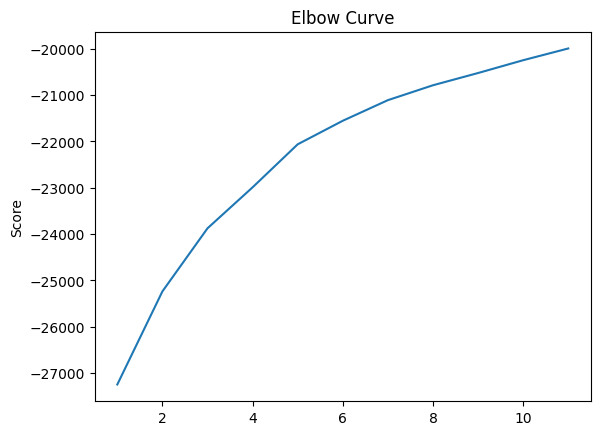

In [76]:
# elbow curve 그리기
cluster_range = range(1, 12) 
kmeans = [KMeans(n_clusters=i) for i in cluster_range]
score = [kmeans[i].fit(X_df_v1_scaled).score(X_df_v1_scaled) for i in range(len(kmeans))]

plt.plot(cluster_range, score)
plt.xlabel('')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [77]:
# v1 데이터에 대해 4개의 클러스터를 생성한 후, v4 데이터에 클러스터를 부여합니다. 
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_df_v1_scaled)
X_df_v4_clusters = kmeans.predict(X_df_v4_scaled)

# 생성된 클러스터의 중점을 확인합니다. 
X_df_v4_clusters_centers = kmeans.cluster_centers_
print(X_df_v4_clusters_centers[0]) #첫 번째 클러스터

[ 3.84550085e-01  5.33955857e-01  3.48047538e-02  1.18845501e-02
  3.48047538e-02  8.74363328e-01  1.25636672e-01  1.00169779e-01
  3.53140917e-01  2.76740238e-01  2.02886248e-01  5.94227504e-02
  1.68930390e-01  8.31069610e-01  9.99151104e-01  8.48896435e-04
  6.02716469e-01  1.68930390e-01  2.28353141e-01 -2.10942375e-15
  1.00000000e+00  9.23599321e-01  7.64006791e-02  7.13073005e-02
  1.71477080e-01  6.28183362e-02  2.32597623e-01  2.89473684e-01
  1.72325976e-01  2.69100170e-01  2.58064516e-01  3.42954160e-01
  1.29881154e-01  2.42861287e-17  0.00000000e+00  1.74872666e-01
  2.87775891e-01  1.01867572e-02  6.87606112e-02  1.82512733e-01
  2.65704584e-01  0.00000000e+00  4.74533107e-01  4.20203735e-01
  5.60271647e-02  4.49915110e-02  3.39558574e-03  8.48896435e-04
 -2.38524478e-18  1.00000000e+00  1.38777878e-17 -1.21430643e-17
  5.42101086e-20  0.00000000e+00  0.00000000e+00 -2.38524478e-18
  1.00000000e+00 -9.71445147e-17  7.21561969e-01  1.80531975e-01
  4.66258350e-01]


*  61컬럼을 모델의 input으로 넣었기 때문에 첫 번째 클러스터의 61차원의 값이 반환됨

In [78]:
# v4 데이터 포인트에 할당된 클러스터와 중점까지의 거리를 구합니다. 
dist = [np.linalg.norm(x-y) for x,y in zip(X_df_v4_scaled, X_df_v4_clusters_centers[X_df_v4_clusters])]

# 거리에 기반하여 fraud 여부를 할당합니다. 
is_fraud_pred = np.array(dist)
is_fraud_pred[dist>=np.percentile(dist, 90)] = 1 # 아웃라이더 사기다
is_fraud_pred[dist<np.percentile(dist, 90)] = 0

In [79]:
# 예측 결과 확인 
print( X_df_v4.shape ) 
print( is_fraud_pred.shape )

(3282, 61)
(3282,)


In [80]:
is_fraud_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
y_pred = is_fraud_pred
y = Y_df_v4

In [82]:
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

# 이상치에 대한 f1-score : 0.18 을 기록하였습니다.

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3203
           1       0.11      0.47      0.18        79

    accuracy                           0.90      3282
   macro avg       0.55      0.69      0.56      3282
weighted avg       0.96      0.90      0.93      3282

[[2911  292]
 [  42   37]]


In [83]:
y.sum()

is_fraud    79
dtype: int64